## Clustering 2


Sellel töölehel jätkame clustering algoritmidega ja viime läbi clusterdamise andmetega.

K-Means simulatsioon: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/


In [3]:
import sys
print(sys.path)

['/Users/gustavtamkivi/Documents/Code/someschoolting/5. ylesanne', '/Library/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/gustavtamkivi/Library/Python/3.11/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages']


In [5]:
#Laeme sisse andmed irise datasetist
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
andmed= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

andmed['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
andmed

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


Meie lõppeesmärk on vaadata, et kas me saame andmete sepal_length, sepal_width, petal_length ja petal_with abil arvata, et kas tegemist on setosa (ehk target = 0), versicolor (ehk target = 1) või virginicaga (target = 2).

## Ülesanne 1

All on koostatud andmestik df, kus on kolm setosa iirist, kolm virginica iirist ning kolm versicolor iirist. 

Arvuta välja kõikide punktide vahelised kaugused kasutades eukleidilist kaugust (vt eelmist töölehte), võid andmed
esitada nt listina või prindi lihtsalt välja. Hetkel jätame kõrvale petal_lengthi ja petal_widthi (ehk vaatame ainult sepal_lengthi ja sepal_widthi).

Abiliseks on all toodud koodinäide, kuidas for tsükli abil info kätte saada.

In [56]:
from math import dist
import itertools

ids = [0,1,2,50,51,52,131,135,117]
df = andmed[andmed.index.isin(ids)]
z = []
for index1, row1 in df.iterrows():
    #print(index1, row1)
    p1 = list(row1[["sepal length (cm)","sepal width (cm)"]])
    z.append(p1)

combinations = list(itertools.combinations(z,2))
for i in combinations:
    print(dist(i[0],i[1]))



#KUSTUTADA
'''
import numpy as np
for index1, row1 in df.iterrows():
    for index2, row2 in df.iterrows():
        p1 = np.array(row1[["sepal length (cm)","sepal width (cm)"]])
        p2 = np.array(row2[["sepal length (cm)","sepal width (cm)"]])
        kaugus = sum((p1-p2)**2)**0.5
        print(p1,p2,kaugus)

'''

0.5385164807134502
0.49999999999999944
1.9235384061671348
1.334166406412634
1.8439088914585782
2.6172504656604807
2.8160255680657453
2.6476404589747458
0.2828427124746193
2.1095023109728985
1.5132745950421556
2.0024984394500787
2.9120439557122073
3.1048349392520045
2.8
2.3
1.7000000000000002
2.202271554554524
3.059411708155671
3.2557641192199416
3.006659275674582
0.5999999999999996
0.1414213562373093
0.9219544457292886
1.0816653826391969
0.728010988928052
0.5099019513592785
1.431782106327635
1.6155494421403511
1.3152946437965904
1.0630145812734646
1.22065556157337
0.8062257748298548
0.20000000000000018
0.7999999999999998
0.824621125123532


'\nimport numpy as np\nfor index1, row1 in df.iterrows():\n    for index2, row2 in df.iterrows():\n        p1 = np.array(row1[["sepal length (cm)","sepal width (cm)"]])\n        p2 = np.array(row2[["sepal length (cm)","sepal width (cm)"]])\n        kaugus = sum((p1-p2)**2)**0.5\n        print(p1,p2,kaugus)\n\n'

## Ülesanne 2

Koosta graafik, kus x-teljel on sepal length (cm) ja y-teljel sepal width (cm) ning värvina on eristatud iirise tüüp.

Lisa graafikule pealkiri ning telgede nimed

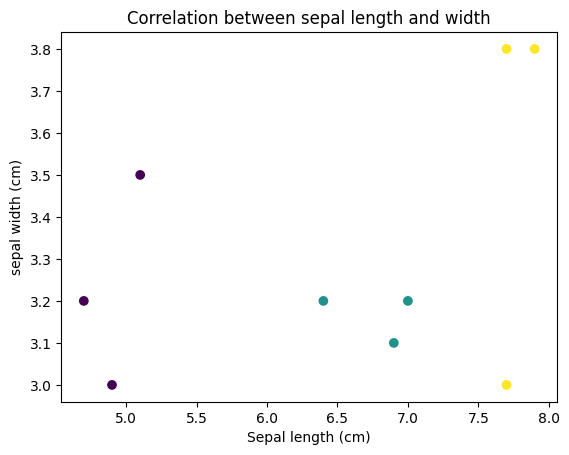

In [61]:
import matplotlib.pyplot as plt
X = df["sepal length (cm)"]
Y = df["sepal width (cm)"]
C = df["target"]


#kustutada

plt.scatter(X,Y,c=C)
plt.xlabel("Sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Correlation between sepal length and width")
plt.show()


## Ülesanne 3 

Kasuta sama andmestikku, proovime ennustada sepal length, sepal widthi järgi iirise liiki.

1) Vii läbi k-means clustering juhul kui k = 1, 2, 3, 4, ..7 (kasuta eelmise töölehe lõpus olevat koodi

2) Tee iga tulemuse kohta graafik (nagu ülesandes 2), kus värv näitab ennustatud clustrite värvi (ehk kui k = 2, siis kahe värviga, kui k= 5, siis viie värviga jne). 

3) Analüüsi, milline oleks parim k-de arv.



In [ ]:
from sklearn.cluster import KMeans, 
from sklearn.datasets import make_blobs

X = andmed[['sepal length (cm)', 'sepal width (cm)']]
kmeans = KMeans(n_clusters=3,max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(iris["data"])
silhouette_average = 
kmeans.fit(X)
iris = load_iris()

print(kmeans.labels_), print(list(andmed["target"]))

In [55]:
from sklearn.cluster import KMeans

data = list(zip(X, Y))
inertias = []

for i in len():
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Kustutada


TypeError: len() takes exactly one argument (0 given)